In [1]:
import pandas as pd
data = pd.read_csv('creditcard.csv')  


In [2]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
missing_values = data.isnull().sum()
missing_values


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
num_genuine = data['Class'].value_counts()[0]
num_fraud = data['Class'].value_counts()[1]
percentage_fraud = (num_fraud / (num_genuine + num_fraud)) * 100


In [5]:
num_genuine

284315

In [6]:
num_fraud

492

In [7]:
percentage_fraud

0.1727485630620034

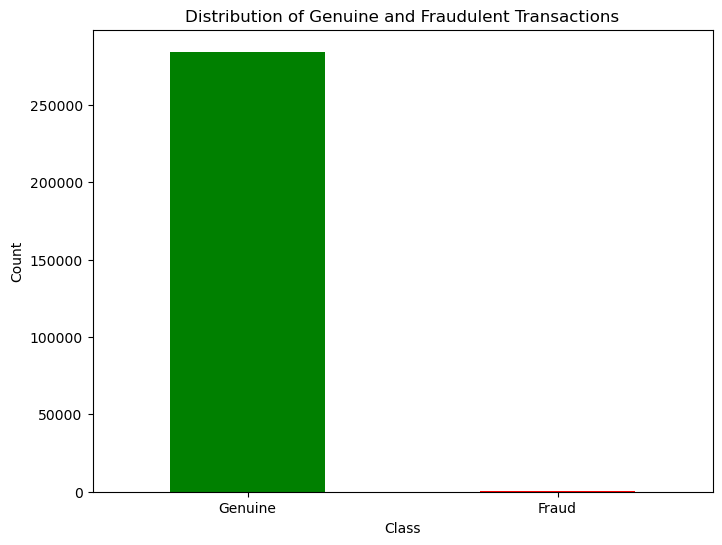

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
data['Class'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Genuine and Fraudulent Transactions')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Genuine', 'Fraud'], rotation=0)
plt.show()


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data['NormalizedAmount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))


In [10]:
data['NormalizedAmount']

0         0.244964
1        -0.342475
2         1.160686
3         0.140534
4        -0.073403
            ...   
284802   -0.350151
284803   -0.254117
284804   -0.081839
284805   -0.313249
284806    0.514355
Name: NormalizedAmount, Length: 284807, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split

X = data.drop(['Class', 'Amount'], axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [23]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier()

decision_tree_model.fit(X_train, y_train)



DecisionTreeClassifier()

In [24]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)


RandomForestClassifier()

In [26]:
dt_predictions = decision_tree_model.predict(X_test)
rf_predictions = random_forest_model.predict(X_test)


In [27]:
from sklearn.metrics import accuracy_score
dt_accuracy = accuracy_score(y_test, dt_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)


In [28]:
from sklearn.metrics import classification_report, confusion_matrix
dt_classification_report = classification_report(y_test, dt_predictions)
rf_classification_report = classification_report(y_test, rf_predictions)

dt_confusion_matrix = confusion_matrix(y_test, dt_predictions)
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)


In [29]:
print(f"Decision Tree Accuracy: {dt_accuracy}")
print(f"Random Forest Accuracy: {rf_accuracy}")

print("\nDecision Tree Classification Report:")
print(dt_classification_report)

print("\nRandom Forest Classification Report:")
print(rf_classification_report)

print("\nDecision Tree Confusion Matrix:")
print(dt_confusion_matrix)

print("\nRandom Forest Confusion Matrix:")
print(rf_confusion_matrix)


Decision Tree Accuracy: 0.9991924440855307
Random Forest Accuracy: 0.9996137776061234

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.72      0.82      0.76       136

    accuracy                           1.00     85443
   macro avg       0.86      0.91      0.88     85443
weighted avg       1.00      1.00      1.00     85443


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.94      0.81      0.87       136

    accuracy                           1.00     85443
   macro avg       0.97      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443


Decision Tree Confusion Matrix:
[[85263    44]
 [   25   111]]

Random Forest Confusion Matrix:
[[85300     7]
 [   26   110]]
